## Bert 논문 리뷰

### 01 what is Bert?
1. Bert Architecture
2. State of Art

### 02 Bert Architecture
1. Pre-training task
2. Input Embedding
3. Encoding
4. Fine-tuning

#### 기존 자연어 처리 신경망

https://mino-park7.github.io/images/2018/12/%EA%B7%B8%EB%A6%BC1-bert-openai-gpt-elmo-%EC%B6%9C%EC%B2%98-bert%EB%85%BC%EB%AC%B8.png

1. RNN ( 순환 신경망 ) : 각 새로운 입력층마다 hidden layer 를 저장/수정 하여 새로운 정보를 점차 업데이트 해나아가는 신경망
2. LSTM : RNN의 응용모델로 각 신경망에 hidden state 와 cell state 를 더해주어 오랜시간 이전 정보를 기억
3. Transformer (Encoder-Decoder): 기존 RNN base 모델과 다르게 문장 전체를 입력후 각 단어의 위치를 학습하여 Encoding ( 수치화 ) 후 Decoding (번역 ) 하는 신경망
4. Attention: Transformer 의 응용으로 문장중 중요한 단어에 가중치를 부여 
5. Bert : Transformer의 Encoder 에 Self Attenion 을 적용한 학습법으로  단어의 양 위치 (Bi-directional) 을 학습, 문맥의 흐름을 이해


## BERT ( Bi-directional Encoder Representation from Transformers)

Purpose: 문장/문단의 문맥을 이해하는 언어 이해 모델로서 사용자의 니즈에 따라 다양하게 사용할수있는 모델

* 기존의 좋은 평가를 받아온 ELMO 보다 좋은 성능
* ELMO : Uni-directional LSTM Model
* GPT : left to right, and right to left transformer model

* NLP 의 11 개 테스크에서 state of art 기록
* SQuAD 기록 갱신
* 사용자는 Transfer Learning 을 통해 학습된 모델을 가져와 Fine -tuning 을 통해 필요에 맞게 사용 가능하다.
* Transformer 모델 기반
    - Encoder 부분 사용
    - Speed, Accuracy , Long-term decedency 에서 우수한 모델
    
    


## BERT ARCHITECTURE
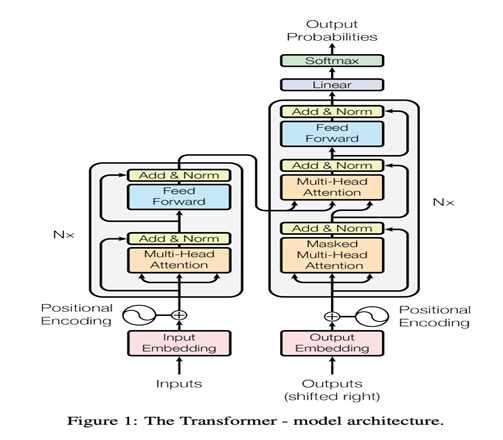
'Attention is All' 논문에서 발표된 Transformer 모델의 Encoding 부분 차용

1. Pre-training task
2. Fine-Tuning <br>

※ 2 가지 버전 : 
    * Bert-Base ( L=12, H=768, A=12) <br>
    * Bert-Large( L=24, H=1024, A=16)<br>
    * 해당 문서에서는 Base 버전 으로 진행


<hr>

## 1. Pre - training 

### 1. pre-training tasks
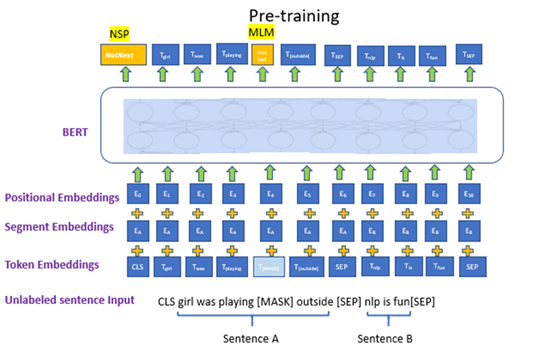
    * Masked Language Modelling
        * 문장내의 15% 의 랜덤한 단어를 가린다 <MASK> 
        단
            * 80% ['MASK'] Token 
            * 10% Random 단어, 10% 정상 단어
            * 해당 방법을 통해, mask 뿐만 아니라 정상, 랜덤 단어 역시 학습하여 모든단어에 대한 문맥 표현을 학습
    * Next Sentence Prediction
        * 문장 B 가 문장 A 의 바로 다음에 오는 문장이 맞는지에 대한 여부를 예측 
        * 문장의 50% 비율로 두 문장의 연결을 랜덤하게 구성
        * 문장 B가 문장 A의 이어지는 문장일경우 IsNext 라고 레이블링, 아닐경우 NotNext 
            * 예) Input = [CLS] the man went to [MASK] store [SEP] he bought a gallon [MASK] milk [SEP] LABEL = IsNext
            * 예) Input = [CLS] the man [MASK] to the store [SEP] penguin [MASK] are flight ##less birds [SEP] Label = NotNext
    <br>
    <br>
    




### 2. Embedding : 

각 단어 Token 을 Vectorize 하는 과정
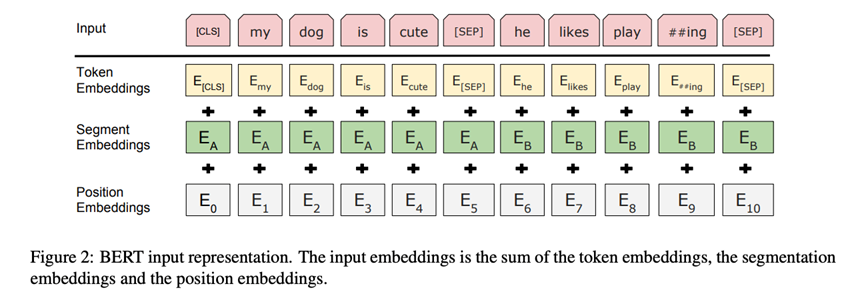

Input = Token Embedding + Segment Embedding + Position Embedding

* Position Encoding 대신 Postion embedding 사용
* Token : 각 단어의 의미를 숫자세트로 표현한 Vector
* Segment : 문단의 문장의 순서/위치 ( 첫번째 문장 0, 두번째 문장 1 etc) 
* Position:  총 문단안의 단어의 순서/위치 
* 입력값 : 각 3개의 임베딩을 합산한 결과를 
    * (Base 의 경우 768 차원의 Vector Large 의 경우 1024)
    * 즉 단어의 의미 + 문장의 위치 + 단어의 위치를 뜻하는 768 차원의 vector 로 Embedding


### 3. Encoding Layers
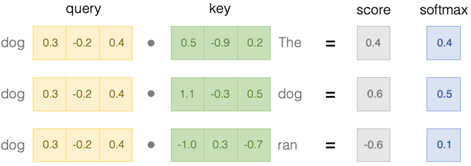
<br>
1.  Multi-Head Attention : 여러 문장속 동일한/연관이 높은 단어에 가중치 를 높여주는 과정
    1. 768 차원의 input vector 를 12개의 head 로 나누어 각 헤드별로 64차원의 Vector 를 Q,K,V값으로 지정한다.
    2. Q 와 K vector의 값을 곱해 연관성을 구한다.<br>
    예) dog Q [0.3, -0.2 0.4] * 'The' K [0.5, -0.9, 0.2]  = 0.4 
    3. 구해진 값에 soft max 를 적용하여 0~1 사이 값으로 scaling 하여 너무높은 또는 낮은 Score 값이 사라지는 문제를 줄인다<br>
    예) [0.4 0,6 -0.6] --> [0.4 0.5 0.1]
    4. 각 구해진 softmax(score) 에 V vector 을 곱한다 (64차원)
    5. 나누어진 12개의 Head에 동일한 작업 진행후 나온 12개의 64차원 vector 를 sum 하여 최초와 동일한 768개의 vector 생성
<br>
<br>

    Encoding Layer  N번의 Layer 에서 반복 실행

2. Add & Normalize
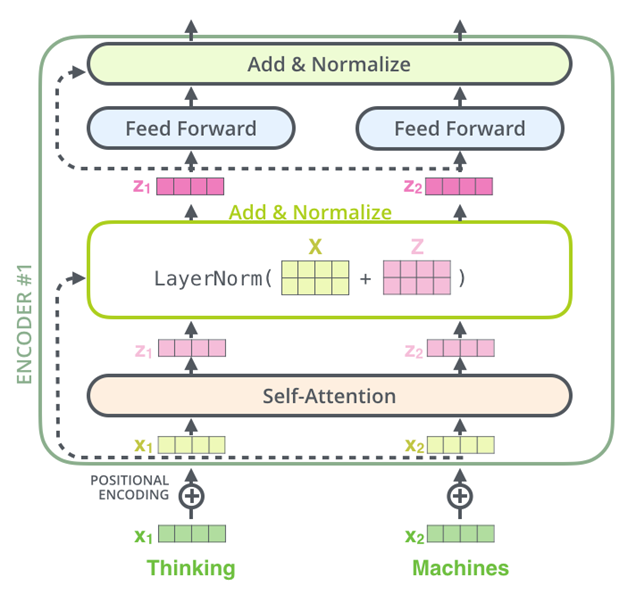
    * ResNet : 기존의 Embedding input vector 를 Self-Attention 값에 더하고 Normalize 

    * Normalize: 정규화로 인해, Layer를 효과적으로 Stablize
<br>


<hr>

## 2. Fine-Tuning

* Bert Tasks:
    * Text similarity : 두개의 text corpus 가 같은 의미를 가지고 있는지 구분하는 Binary Classification
    * Reply Matching : 두개의 text corpus 가 자연스럽게 이어지는지 구분하는 Binary Classification
    * Intent Classificaition : 문장/문단의 의도를 파악하는 classification
        * Sentiment Analysis
        * Question and Answer 
        * Name Entity Recognition 
* Feature-based vs. Fine-tuning
    * Feature- based approach : 특정 task 를 수행하는 network 에 추가적인 Feature 로 제공 , 즉 두개의 network 를 붙여서 사용 ( ELMO )
    * Fine-tuning approach : Pre-trained 된 parameter 들을 downstream task학습
        * NER: Pretrained 된 Bert 모델을 CONLL (NNP 중 Person, Organization 등이 Labelling system) 과 같은 Labelling 을 주어 Supervised Learning
